<a href="https://colab.research.google.com/github/IT21268830/DL-LAB03/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data_frame = pd.read_csv('Countries.csv')

In [ ]:
data_frame.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


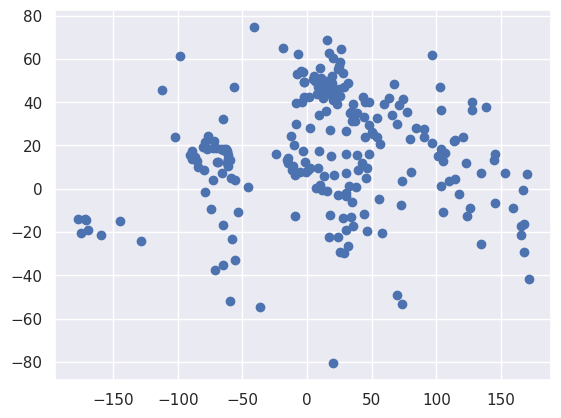

In [ ]:
plt.scatter(data_frame['Longitude'], data_frame['Latitude'])

In [ ]:
data_frame.shape

(241, 3)

In [ ]:
cluster_data = data_frame.iloc[:,[1,2]]


In [ ]:
cluster_data.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [ ]:
ss = StandardScaler()
cluster_data = pd.DataFrame(ss.fit_transform(cluster_data), columns=['Longitude', 'Latitude'])

In [ ]:
cluster_data.head()


,Longitude,Latitude
0,-1.171629,-0.175422
1,0.720657,0.628927
2,0.046226,-1.111849
3,-1.075368,0.039797
4,0.081187,0.904683


In [ ]:
kmeans = KMeans(4)

In [ ]:
kmeans.fit(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
identified_clusters = kmeans.fit_predict(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
identified_clusters

array([3, 2, 1, 3, 2, 2, 2, 2, 1, 2, 3, 1, 0, 1, 3, 0, 2, 2, 1, 2, 1, 1,
       0, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 0, 0, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 3, 2, 3, 2, 3, 2, 1,
       2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 3, 2, 3, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       0, 2, 2, 1, 2, 0, 3, 3, 0, 2, 2, 0, 2, 1, 2, 3, 2, 0, 1, 2, 2, 2,
       0, 3, 2, 2, 2, 1, 0, 3, 0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 3, 1, 1, 0,
       1, 0, 1, 0, 1, 3, 3, 2, 2, 0, 0, 0, 2, 2, 3, 3, 3, 0, 0, 0, 2, 3,
       0, 2, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 3, 2, 1,
       1, 2, 2, 1, 3, 2, 2, 2, 1, 3, 1, 2, 3, 1, 1, 0, 2, 2, 0, 3, 3, 2,
       2, 0, 1, 1, 2, 1, 3, 2, 2, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
new_data = data_frame.copy()

In [ ]:
new_data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [ ]:
new_data['ClusterNo']=identified_clusters

In [ ]:
new_data

,name,Longitude,Latitude,ClusterNo
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,3
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


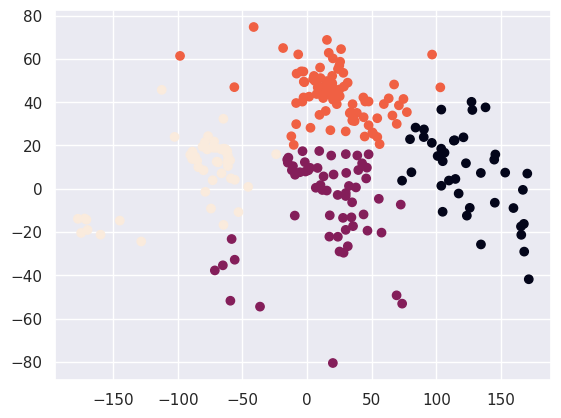

In [ ]:
plt.scatter(new_data['Longitude'],new_data['Latitude'],c=new_data['ClusterNo'])

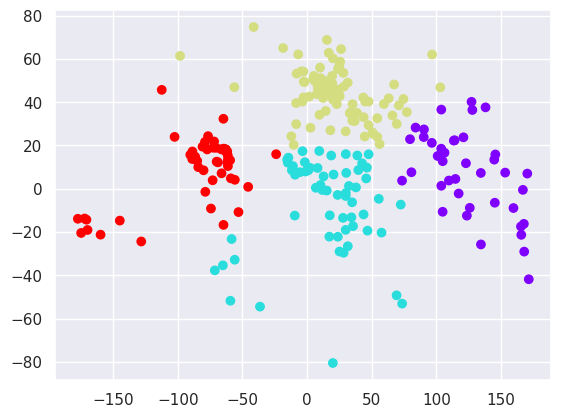

In [ ]:
plt.scatter(new_data['Longitude'],new_data['Latitude'],c=new_data['ClusterNo'],cmap='rainbow')

In [ ]:
wcss=[]
for i in range(1,10):
   kmeans = KMeans(i)
   kmeans.fit(cluster_data)
   wcss_iter = kmeans.inertia_
   wcss.append(wcss_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Within-cluster Sum of Squares')

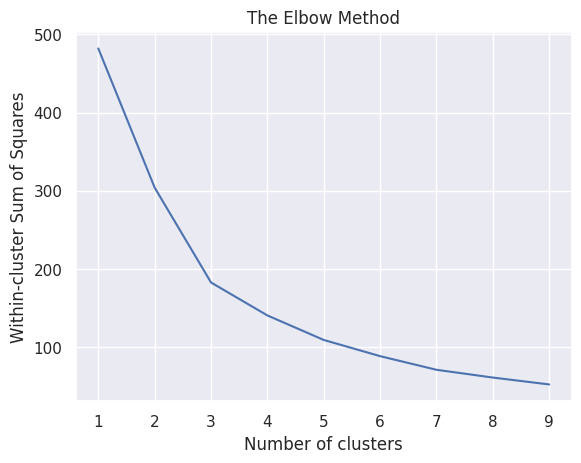

In [ ]:
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')